# Covid-19 Vaccination Progress

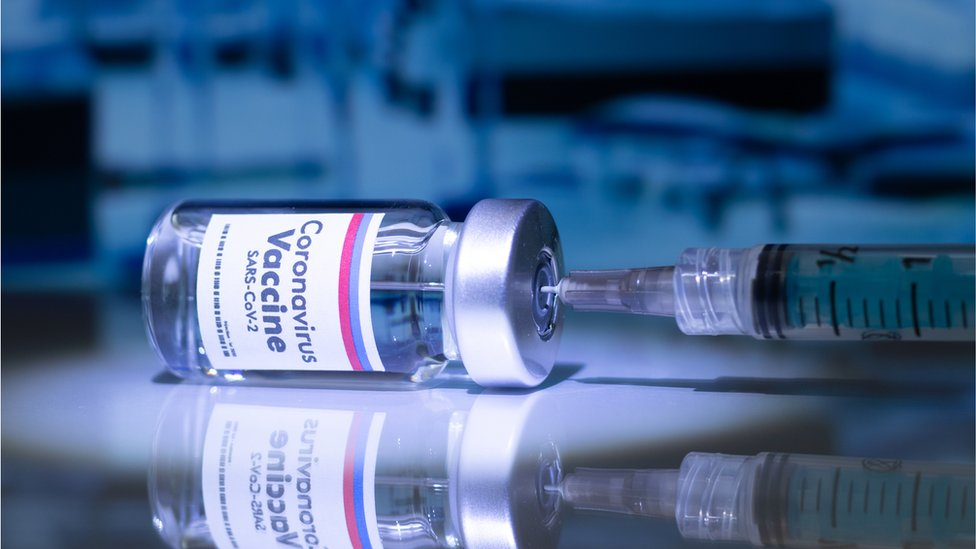



## Introduction

The data contains the following information:

- Country - this is the country for which the vaccination information is provided;
- Country ISO Code - ISO code for the country;
- Date- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
- Total number of vaccin ations - this is the absolute number of total immunizations in the country;
- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be - -  larger than the number of people;
- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
- Number of vaccinations per day - number of daily vaccination for that day and country;
- Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
- Vaccines used in the country - total number of vaccines used in the country (up to date);
- Source name - source of the information (national authority, international organization, local organization etc.);
- Source website - website of the source of information;

## content
-  <a href='#1'>Analysis preparation</a>  
-  <a href='#2'>What vaccines are used in each country?</a>    
-  <a href='#3'>Which vaccination scheme is used most?</a>    
-  <a href='#4'>How many are vaccinated (total and as percent from population)?</a>    
-  <a href='#5'>How the vaccination progressed</a>  

## Last updated
---

# Progresso da vacinação contra a COVID-19

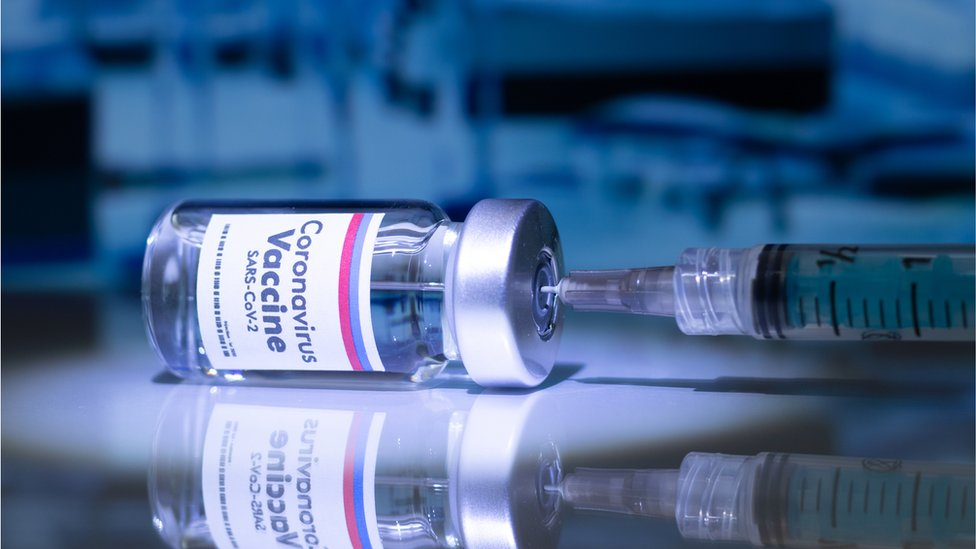

Os dados contêm as seguintes informações: * **País** - este é o país para o qual as informações de vacinação são fornecidas; * **Código ISO do país** - código ISO para o país; * **Data** - data para a entrada de dados; para algumas das datas, temos apenas as vacinações diárias, para outras, apenas o total (cumulativo); * **Número total de vacinações** - este é o número absoluto de imunizações totais no país; * **Número total de pessoas vacinadas** - uma pessoa, dependendo do esquema de imunização, receberá uma ou mais vacinas (normalmente 2); em um determinado momento, o número de vacinações pode ser maior que o número de pessoas; * **Número total de pessoas totalmente vacinadas** - este é o número de pessoas que receberam todo o conjunto de imunizações de acordo com o esquema de imunização (normalmente 2); em um determinado momento, pode haver um certo número de pessoas que receberam uma vacina e outro número (menor) de pessoas que receberam todas as vacinas do esquema; * **Vacinações diárias (brutas)** - para uma determinada entrada de dados, o número de vacinações para aquela data/país; * **Vacinações diárias** - para uma determinada entrada de dados, o número de vacinações para aquela data/país; * **Total de vacinações por cem** - razão (em porcentagem) entre o número de vacinações e a população total até a data no país; * **Número total de pessoas vacinadas por cem** - razão (em porcentagem) entre a população imunizada e a população total até a data no país; * **Número total de pessoas totalmente vacinadas por cem** - proporção (em porcentagem) entre a população totalmente imunizada e a população total até a data no país; * **Número de vacinações por dia** - número de vacinações diárias para aquele dia e país; * **Vacinações diárias por milhão** - proporção (em ppm) entre o número de vacinações e a população total para a data atual no país; * **Vacinas usadas no país** - número total de vacinas usadas no país (atualizado); * **Nome da fonte** - fonte da informação (autoridade nacional, organização internacional, organização local etc.); * **Site da fonte** - site da fonte de informação;

### conteudo

- <a href='#1'>Preparação da análise</a>
- <a href='#2'>Quais vacinas são usadas em cada país?</a>
- <a href='#3'>Qual ​​esquema de vacinação é mais usado?</a>
- <a href='#4'>Quantos são vacinados (total e como porcentagem da população)?</a> 
- <a href='#5'>Como a vacinação progrediu</a> 

### Última atualização
---

In [ ]:
import datetime
import os
import time
with os.scandir("atividade33") as dir_entries:
    for entry in dir_entries:
        unix_timestamp  = int(entry.stat().st_mtime)
        utc_time = time.gmtime(unix_timestamp)
        print(f"Dataset last time updated: {utc_time.tm_year}-{utc_time.tm_mon}-{utc_time.tm_mday}")
        break
        
ldt = datetime.datetime.now()
print(f"Noteboook last time updated: {ldt.year}-{ldt.month}-{ldt.day}")

## Analysis preparation

We initialize the Python packages we will use for data ingestion, preparation and visualization. We will use mostly Plotly for visualization. Then we read the data file and aggregate the data on few fields (country, iso_code and vaccines - that is the vaccination scheme used in a certain country).

We will mainly look to:

* What vaccination schemes are used in various countries;  
* Total number of vaccinations and percent of vaccinations;  
* Daily vaccinations and daily vaccinations per million;\n",
* Total people vaccinated and percent of people vaccinated;  

In the dataset is also information about the total number of people completely vaccinated (and percent of them).

We visualize the latest (maximum) values and as well for the variation in time of the above mentioned values.

---

Inicializamos os pacotes Python que usaremos para ingestão, preparação e visualização de dados. Usaremos principalmente o Plotly para visualização. Em seguida, lemos o arquivo de dados e agregamos os dados em alguns campos (país, iso_code e vacinas - que é o esquema de vacinação usado em um determinado país). Observaremos principalmente:

 Observaremos principalmente: 

* Quais esquemas de vacinação são usados ​​em vários países; 
* Número total de vacinações e porcentagem de vacinações; 
* Vacinações diárias e vacinações diárias por milhão; 
* Total de pessoas vacinadas e porcentagem de pessoas vacinadas; No conjunto de dados também há informações sobre o número total de pessoas completamente vacinadas (e porcentagem delas). Visualizamos os valores mais recentes (máximos) e também a variação no tempo dos valores mencionados acima.




In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_df = pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")

In [ ]:
country_vaccine = data_df.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
country_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']